## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

In [394]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, adjusted_rand_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AgglomerativeClustering


In [395]:
df_bike = pd.read_csv('Ch5_bike_station_locations.csv')
df_bike.head()

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620


In [396]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   244 non-null    float64
 1   longitude  244 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [397]:
df_bike.describe()

,latitude,longitude
count,244.000000,244.000000
mean,38.914289,-77.010109
std,0.035435,0.041084
min,38.827425,-77.106502
25%,38.891574,-77.031987
50%,38.916397,-77.011474
75%,38.935887,-76.985866
max,38.987980,-76.919470


In [398]:
df_bike_standard_scale = df_bike.copy()
scaler = StandardScaler()
df_bike_standard_scale[['latitude', 'longitude']] = scaler.fit_transform(df_bike_standard_scale[['latitude', 'longitude']])

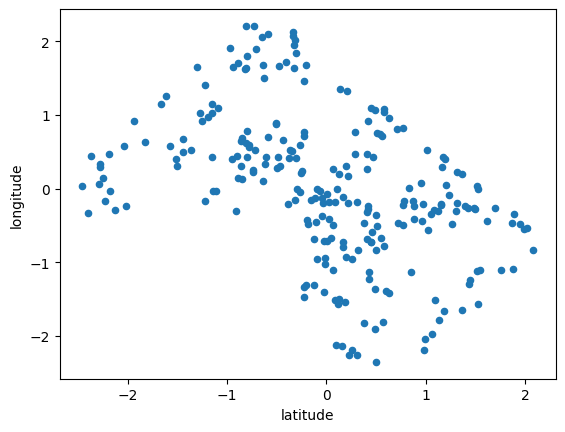

In [399]:
df_bike_standard_scale.plot(x='latitude', y='longitude', kind='scatter')
plt.show()

### 1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.

In [400]:
X_bike_standard_scaled = df_bike_standard_scale[['latitude', 'longitude']]

In [401]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X_bike_standard_scaled)

KMeans(n_clusters=3)

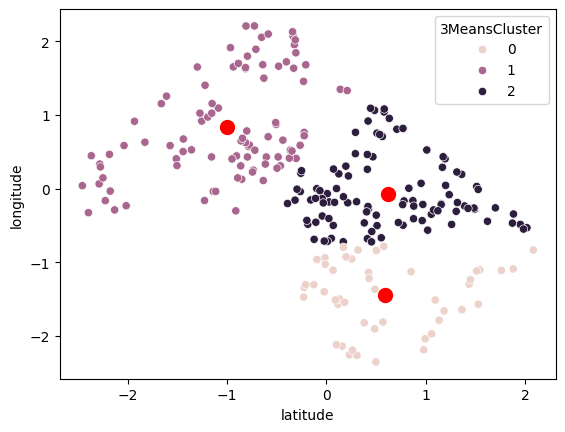

In [402]:
df_bike_standard_scale['3MeansCluster'] = kmeans3.labels_
sns.scatterplot(x='latitude', y='longitude', hue='3MeansCluster', data=df_bike_standard_scale)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=100, c='red') 
plt.show()

In [403]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X_bike_standard_scaled)

KMeans(n_clusters=4)

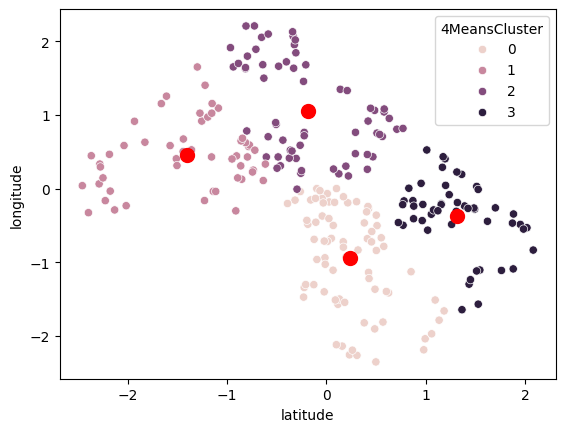

In [404]:
df_bike_standard_scale['4MeansCluster'] = kmeans4.labels_
sns.scatterplot(x='latitude', y='longitude', hue='4MeansCluster', data=df_bike_standard_scale)
plt.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], s=100, c='red')
plt.show()

scaling ?

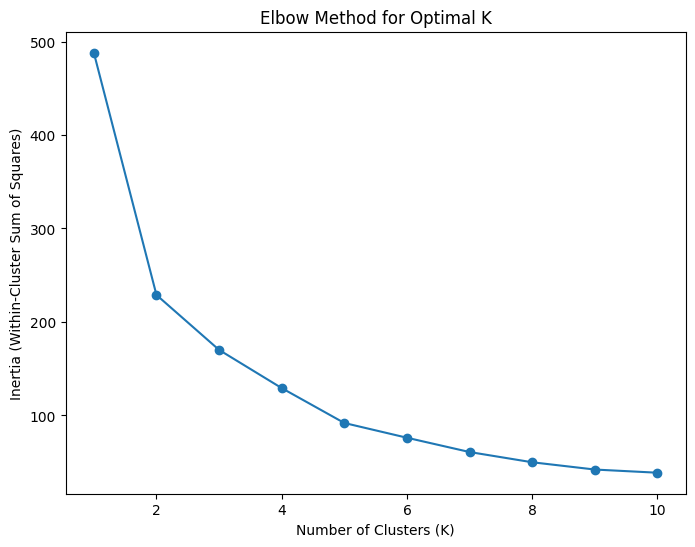

In [405]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_bike_standard_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()
print()

In [406]:
for i in range(1, len(inertia)):
    print('k={0}: {1}'.format(i, inertia[i-1] - inertia[i]))

k=1: 259.0859372433326
k=2: 58.77213850391385
k=3: 40.84709420017279
k=4: 37.32111032183815
k=5: 15.774742416904047
k=6: 15.285644489664975
k=7: 10.943574152258506
k=8: 7.777284068059075
k=9: 3.4049084896399293


Based on the elbow plot, inertia drops sharply until k=5 and then levels off, so choosing 5 clusters captures most of the structure without unnecessary complexity. 

### 2. Visualize the K-Means clustering result for the best K.

In [407]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X_bike_standard_scaled)

KMeans(n_clusters=5)

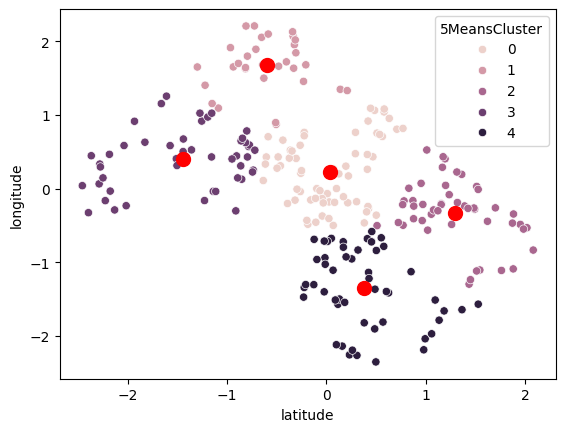

In [408]:
df_bike_standard_scale['5MeansCluster'] = kmeans5.labels_
sns.scatterplot(x='latitude', y='longitude', hue='5MeansCluster', data=df_bike_standard_scale)
plt.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1], s=100, c='red')
plt.show()

### 3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.

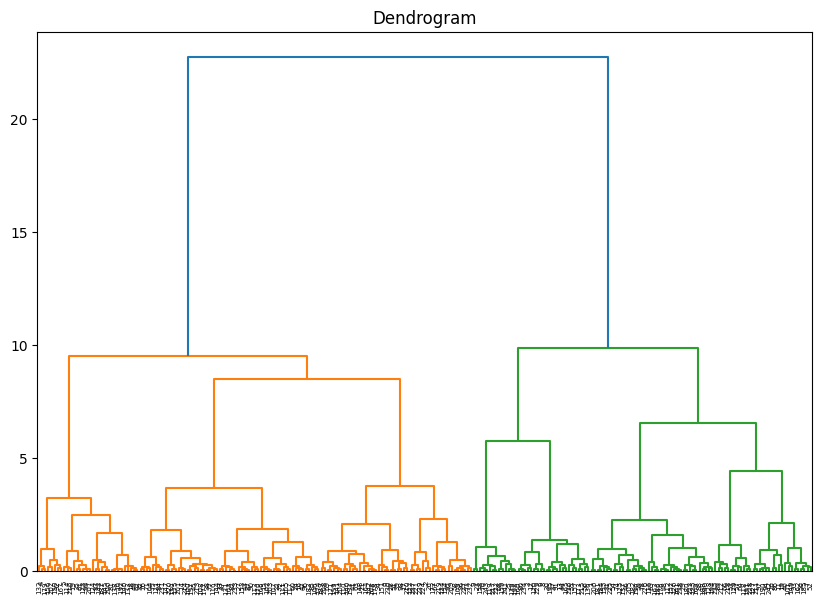

In [409]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X_bike_standard_scaled, method='ward'))
plt.show()

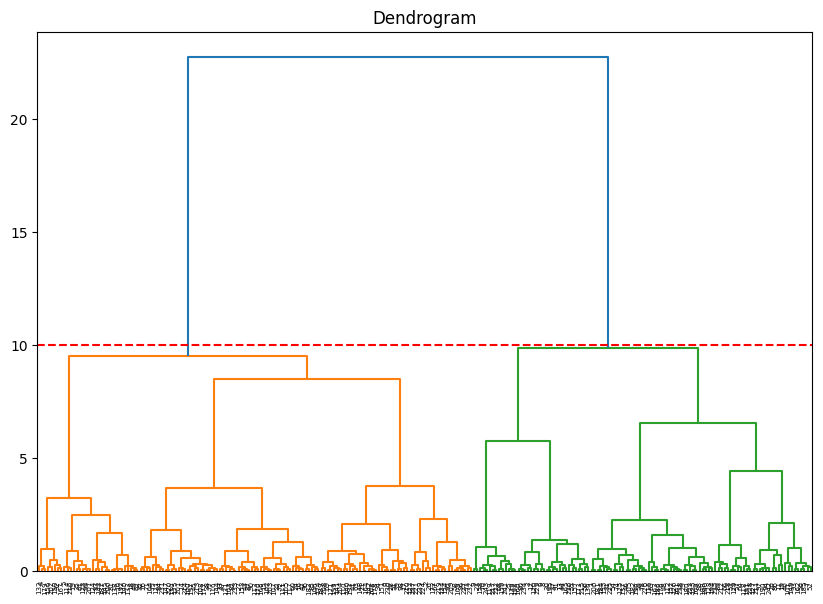

In [410]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X_bike_standard_scaled, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

so from the biggest jump we would do 10. so 2 clusters

### 4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.

In [411]:
def aggClustering(n):
    aggClustering = AgglomerativeClustering(n_clusters=n)
    aggClustering.fit(X_bike_standard_scaled)
    df_bike["aggCluster{0}".format(n)] = aggClustering.labels_
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='latitude', y='longitude', hue= "aggCluster{0}".format(n), data=df_bike)
    plt.title("Agglomerative Clustering with {0} Clusters".format(n))
    plt.show()

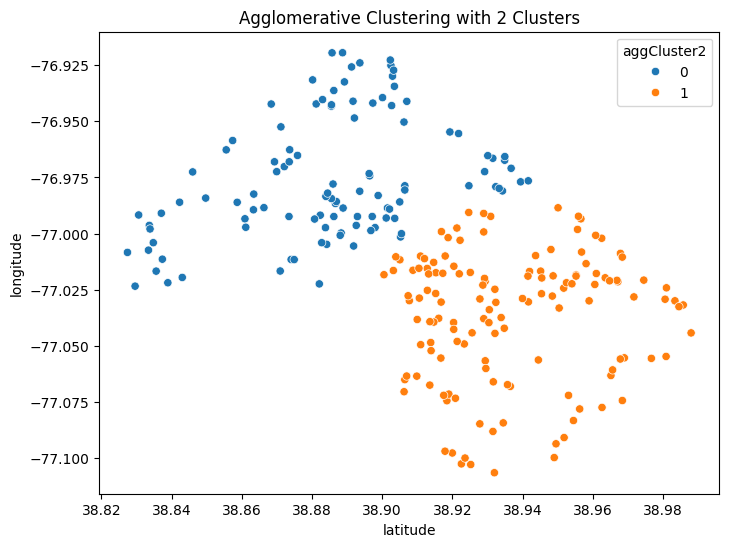

In [412]:
aggClustering(2)

### 5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)

In [413]:
eps_values = [0.01, 0.012, 0.014, 0.016, 0.018, 0.02]
min_samples_values = [3, 5, 7, 10]

for min_samples in min_samples_values:
    print(f"--- min_samples = {min_samples} ---")
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_bike[['latitude', 'longitude']])
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps={eps:.3f}, clusters={n_clusters}, noise points={n_noise}")


--- min_samples = 3 ---
eps=0.010, clusters=10, noise points=10
eps=0.012, clusters=5, noise points=8
eps=0.014, clusters=2, noise points=1
eps=0.016, clusters=1, noise points=0
eps=0.018, clusters=1, noise points=0
eps=0.020, clusters=1, noise points=0
--- min_samples = 5 ---
eps=0.010, clusters=10, noise points=26
eps=0.012, clusters=6, noise points=13
eps=0.014, clusters=4, noise points=3
eps=0.016, clusters=1, noise points=0
eps=0.018, clusters=1, noise points=0
eps=0.020, clusters=1, noise points=0
--- min_samples = 7 ---
eps=0.010, clusters=6, noise points=87
eps=0.012, clusters=5, noise points=40
eps=0.014, clusters=3, noise points=29
eps=0.016, clusters=2, noise points=8
eps=0.018, clusters=1, noise points=0
eps=0.020, clusters=1, noise points=0
--- min_samples = 10 ---
eps=0.010, clusters=5, noise points=126
eps=0.012, clusters=3, noise points=98
eps=0.014, clusters=2, noise points=59
eps=0.016, clusters=3, noise points=28
eps=0.018, clusters=3, noise points=7
eps=0.020, clust

Based on the result, a good configuration appears to be eps=0.014 and min_samples=5. With these values, DBSCAN forms 4 clusters and only 3 points are labeled as noise. This suggests that the parameters effectively group similar bike locations into distinct clusters while minimizing outliers.

### 6. Visual the final DBSCAN clustering you decided upon in 5.

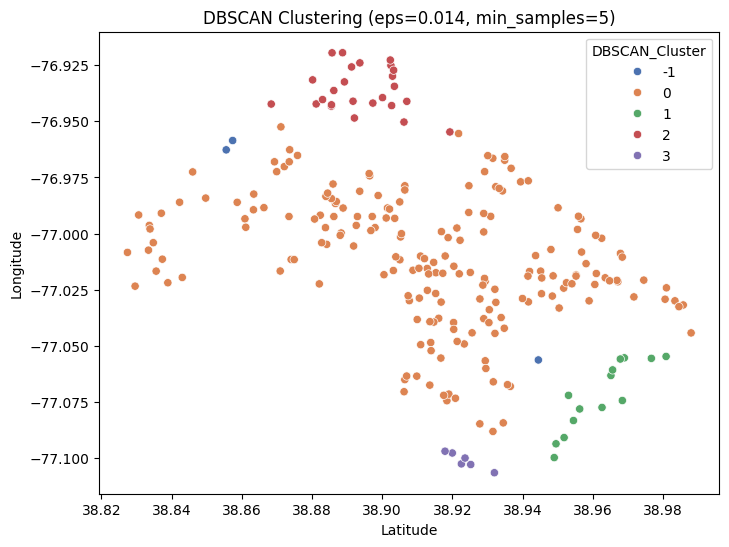

In [414]:
best_eps = 0.014
min_samples = 5

# Apply DBSCAN to the raw bike dataset
dbscan_final = DBSCAN(eps=best_eps, min_samples=min_samples)
df_bike['DBSCAN_Cluster'] = dbscan_final.fit_predict(df_bike[['latitude', 'longitude']])

# Visualize the clustering result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_bike, x='latitude', y='longitude', hue='DBSCAN_Cluster', palette='deep')
plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={min_samples})")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

### 7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

In [415]:
# For K-Means (trained on standard scaled data)
X_kmeans = df_bike_standard_scale[['latitude', 'longitude']]
sil_kmeans = silhouette_score(X_kmeans, df_bike_standard_scale['5MeansCluster'])

# For Agglomerative (assuming you used the standard-scaled data, and stored labels in 'aggCluster2')
X_agg = df_bike_standard_scale[['latitude', 'longitude']]
sil_agg = silhouette_score(X_agg, df_bike['aggCluster2'])

# For DBSCAN (trained on raw data)
X_dbscan = df_bike[['latitude', 'longitude']]
sil_dbscan = silhouette_score(X_dbscan, df_bike['DBSCAN_Cluster'])

print("Silhouette Scores:")
print("K-Means:", sil_kmeans)
print("Agglomerative:", sil_agg)
print("DBSCAN:", sil_dbscan)

# Now, calculate Adjusted Rand Index (ARI) between each pair.
# ARI does not depend on the features, just the cluster assignments.
ari_km_agg = adjusted_rand_score(df_bike_standard_scale['5MeansCluster'], df_bike['aggCluster2'])
ari_km_db = adjusted_rand_score(df_bike_standard_scale['5MeansCluster'], df_bike['DBSCAN_Cluster'])
ari_agg_db = adjusted_rand_score(df_bike['aggCluster2'], df_bike['DBSCAN_Cluster'])

print("\nAdjusted Rand Index (ARI) Comparisons:")
print("K-Means vs Agglomerative:", ari_km_agg)
print("K-Means vs DBSCAN:", ari_km_db)
print("Agglomerative vs DBSCAN:", ari_agg_db)

Silhouette Scores:
K-Means: 0.4078985375365997
Agglomerative: 0.44897181934187813
DBSCAN: 0.11689060172791327

Adjusted Rand Index (ARI) Comparisons:
K-Means vs Agglomerative: 0.2662475445269831
K-Means vs DBSCAN: 0.11131309386442835
Agglomerative vs DBSCAN: 0.05003329395088681


The silhouette scores suggest that Agglomerative clustering produces the most cohesive and well-separated clusters (≈0.449), followed by K-Means (≈0.392), while DBSCAN’s clusters appear less well-defined (≈0.237). The Adjusted Rand Index shows moderate agreement between K-Means and Agglomerative (≈0.341), but DBSCAN’s clustering is quite different from both (≈0.135 and ≈0.102 when compared with K-Means and Agglomerative, respectively). This indicates that Agglomerative clustering is yielding the most reliable grouping on your data, with K-Means showing similar trends, whereas DBSCAN is producing a notably different partitioning.